In [1]:
import tensorflow as tf
from tensorflow import keras
import os
import numpy as np
import matplotlib.pyplot as plt
seed=0
np.random.seed(seed) # fix random seed
tf.random.set_seed(seed)

In [2]:
from keras.datasets import mnist

# input image dimensions
img_rows, img_cols = 28, 28 # number of pixels 
# output
num_classes = 10 # 10 digits

# the data, split between train and test sets
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print()
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

11501568/11490434 [==============================] - 0s 0us/step
X_train shape: (60000, 28, 28)
Y_train shape: (60000,)

60000 train samples
10000 test samples


In [3]:
from tensorflow.keras.datasets import mnist

# input image dimensions
img_rows, img_cols = 28, 28 # number of pixels 
# output
num_classes = 10 # 10 digits

# the data, split between train and test sets
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()


from tensorflow.keras.layers import Flatten, Conv2D, MaxPooling2D

# reshape data, depending on Keras backend
if keras.backend.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print()
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (60000, 28, 28, 1)
Y_train shape: (60000,)

60000 train samples
10000 test samples


an example of a data point with label 3


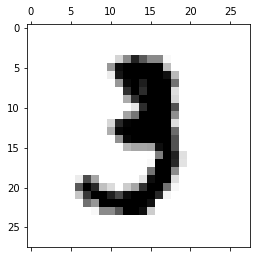

an example of a data point with label 3 before to_categorical ...
... and with label [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.] after to_categorical

X_train shape: (60000, 28, 28, 1)
Y_train shape: (60000, 10)


In [4]:


# reshape data, it could depend on Keras backend

# cast floats to single precesion
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# rescale data in interval [0,1]
X_train /= 255
X_test /= 255

# look at an example of data point
print('an example of a data point with label', Y_train[10])
# matshow: display a matrix in a new figure window
plt.matshow(X_train[10].reshape(28,28),cmap='binary')
plt.show()

print('an example of a data point with label', Y_train[10], 'before to_categorical ...')
# convert class vectors to binary class matrices, e.g. for use with categorical_crossentropy
Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)
print('... and with label', Y_train[10], 'after to_categorical')
print()
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)



Provo una prima rete convoluzionale

In [5]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

#THIS IS INCOMPLETE ... COMPLETE BEFORE EXECUTING IT

def create_CNN():
    # instantiate model
    num_classes=10
    model = Sequential()
    # add first convolutional layer with 10 filters (dimensionality of output space)
    model.add(Conv2D(10, kernel_size=(5, 5),
                     activation='relu',
                     input_shape=input_shape))
    
    model.add(Conv2D(6, (5, 5), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(16, (5, 5), activation='relu'))

    model.add(Flatten())
    model.add(Dense(num_classes, activation='softmax'))    
    
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer='SGD',
                  metrics=['acc'])
    return model

In [8]:
# training parameters
batch_size = 32
epochs = 5

# create the deep conv net
model_CNN=create_CNN()

# train CNN
history=model_CNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

# evaliate model
score = model_CNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/5
1875/1875 [==============================] - 68s 36ms/step - loss: 0.4399 - acc: 0.8637 - val_loss: 0.1577 - val_acc: 0.9524
Epoch 2/5
1875/1875 [==============================] - 68s 36ms/step - loss: 0.1412 - acc: 0.9582 - val_loss: 0.1014 - val_acc: 0.9672
Epoch 3/5
1875/1875 [==============================] - 68s 36ms/step - loss: 0.1051 - acc: 0.9683 - val_loss: 0.0864 - val_acc: 0.9738
Epoch 4/5
1875/1875 [==============================] - 70s 38ms/step - loss: 0.0871 - acc: 0.9743 - val_loss: 0.0714 - val_acc: 0.9790
Epoch 5/5
313/313 [==============================] - 4s 13ms/step - loss: 0.0697 - acc: 0.9776

Test loss: 0.06969933211803436
Test accuracy: 0.9775999784469604


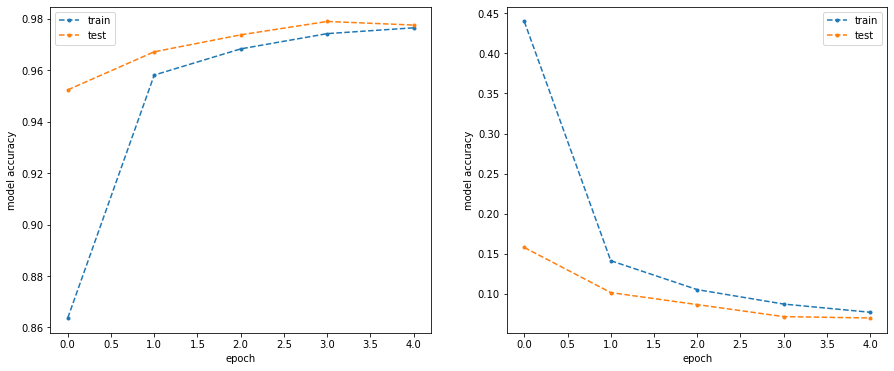

In [14]:

fig,ax=plt.subplots(1,2,figsize=(15,6))
ax[0].plot(history.history['acc'], '.--')
ax[0].plot(history.history['val_acc'], '.--')
ax[0].set_ylabel('model accuracy')
ax[0].set_xlabel('epoch')
ax[0].legend(['train', 'test'], loc='best')


# summarize history for loss
ax[1].plot(history.history['loss'], '.--')
ax[1].plot(history.history['val_loss'], '.--')
ax[1].set_ylabel('model accuracy')
ax[1].set_xlabel('epoch')
ax[1].legend(['train', 'test'], loc='best')

plt.show()

Provo una seconda rete convoluzionale con più layers

In [10]:
def create_CNN2():
    # instantiate model
    num_classes=10
    model = Sequential()
    # add first convolutional layer with 10 filters (dimensionality of output space)
    model.add(Conv2D(10, kernel_size=(5, 5),
                     activation='relu',
                     input_shape=input_shape))
    
    model.add(Conv2D(6, (5, 5), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(6, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(6, (3, 3), activation='relu'))

    model.add(Flatten())
    #model.add(Dense(n_neurons_connected, activation='relu'))
    
    # apply dropout with rate 0.5
    #model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))    
    
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer='SGD',
                  metrics=['acc'])
    return model

In [11]:
# create the deep conv net
model_CNN2=create_CNN2()

# train CNN
history2=model_CNN2.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

# evaliate model
score2 = model_CNN2.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score2[0])
print('Test accuracy:', score2[1])

Epoch 1/5
1875/1875 [==============================] - 71s 37ms/step - loss: 0.9467 - acc: 0.6847 - val_loss: 0.3401 - val_acc: 0.8963
Epoch 2/5
1875/1875 [==============================] - 70s 37ms/step - loss: 0.2795 - acc: 0.9143 - val_loss: 0.2197 - val_acc: 0.9329
Epoch 3/5
1875/1875 [==============================] - 70s 37ms/step - loss: 0.1916 - acc: 0.9416 - val_loss: 0.1553 - val_acc: 0.9530
Epoch 4/5
1875/1875 [==============================] - 70s 38ms/step - loss: 0.1542 - acc: 0.9532 - val_loss: 0.1251 - val_acc: 0.9635
Epoch 5/5
313/313 [==============================] - 4s 13ms/step - loss: 0.1124 - acc: 0.9666

Test loss: 0.11236119270324707
Test accuracy: 0.9666000008583069


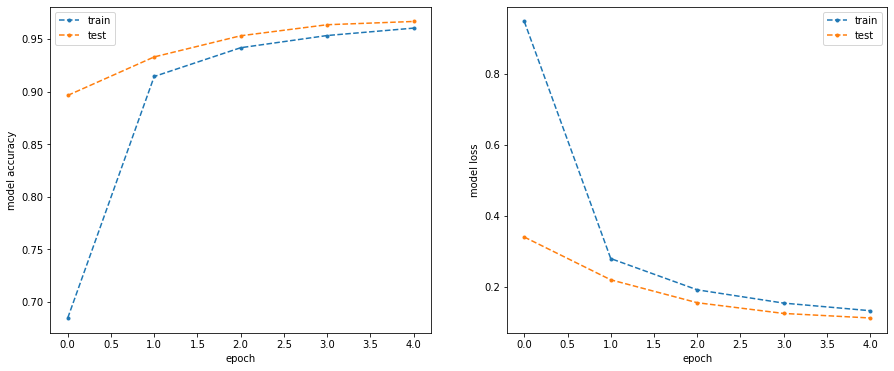

In [34]:
fig,ax=plt.subplots(1,2,figsize=(15,6))

ax[0].plot(history2.history['acc'], '.--')
ax[0].plot(history2.history['val_acc'], '.--')
ax[0].set_ylabel('model accuracy')
ax[0].set_xlabel('epoch')
ax[0].legend(['train', 'test'], loc='best')

# summarize history for loss
ax[1].plot(history2.history['loss'], '.--')
ax[1].plot(history2.history['val_loss'], '.--')
ax[1].set_ylabel('model loss')
ax[1].set_xlabel('epoch')
ax[1].legend(['train', 'test'], loc='best')
plt.show()

In [50]:
def create_CNN3():
    # instantiate model
    num_classes=10
    model = Sequential()
    # add first convolutional layer with 10 filters (dimensionality of output space)
    model.add(Conv2D(10, kernel_size=(5, 5),
                     activation='relu',
                     input_shape=input_shape))
    
    model.add(Conv2D(10, (5, 5), activation='relu'))
    model.add(MaxPooling2D((3, 3)))
    model.add(Conv2D(10, (4, 4), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    #model.add(Conv2D(5, (3, 3), activation='relu'))

    model.add(Flatten())
    #model.add(Dense(n_neurons_connected, activation='relu'))
    
    # apply dropout with rate 0.5
    #model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))    
    
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer='SGD',
                  metrics=['acc'])
    return model

In [51]:
# create the deep conv net
model_CNN3=create_CNN3()

# train CNN
history3=model_CNN3.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

# evaliate model
score3 = model_CNN3.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score3[0])
print('Test accuracy:', score3[1])

Epoch 1/5
1875/1875 [==============================] - 65s 34ms/step - loss: 0.7401 - acc: 0.7702 - val_loss: 0.3045 - val_acc: 0.9073
Epoch 2/5
1875/1875 [==============================] - 64s 34ms/step - loss: 0.2494 - acc: 0.9244 - val_loss: 0.1824 - val_acc: 0.9454
Epoch 3/5
1875/1875 [==============================] - 65s 35ms/step - loss: 0.1827 - acc: 0.9450 - val_loss: 0.1437 - val_acc: 0.9547
Epoch 4/5
1875/1875 [==============================] - 66s 35ms/step - loss: 0.1523 - acc: 0.9546 - val_loss: 0.1235 - val_acc: 0.9614
Epoch 5/5
313/313 [==============================] - 3s 10ms/step - loss: 0.1149 - acc: 0.9640

Test loss: 0.11487115174531937
Test accuracy: 0.9639999866485596


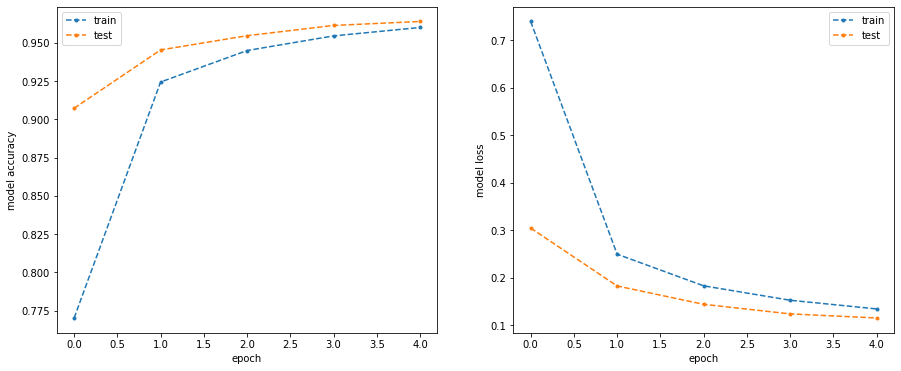

In [52]:
fig,ax=plt.subplots(1,2,figsize=(15,6))

ax[0].plot(history3.history['acc'], '.--')
ax[0].plot(history3.history['val_acc'], '.--')
ax[0].set_ylabel('model accuracy')
ax[0].set_xlabel('epoch')
ax[0].legend(['train', 'test'], loc='best')

# summarize history for loss
ax[1].plot(history3.history['loss'], '.--')
ax[1].plot(history3.history['val_loss'], '.--')
ax[1].set_ylabel('model loss')
ax[1].set_xlabel('epoch')
ax[1].legend(['train', 'test'], loc='best')
plt.show()

In [46]:
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)


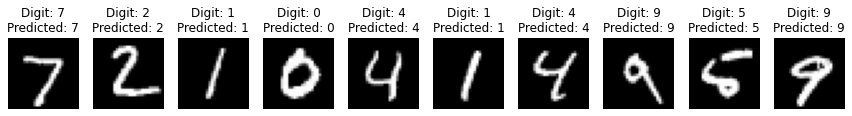

In [47]:
predictions = model_CNN.predict(X_test)


plt.figure(figsize=(15, 15)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted: {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off') 
plt.show()

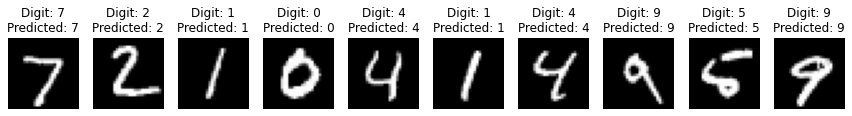

In [48]:
predictions = model_CNN2.predict(X_test)


plt.figure(figsize=(15, 15)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted: {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off') 
plt.show()

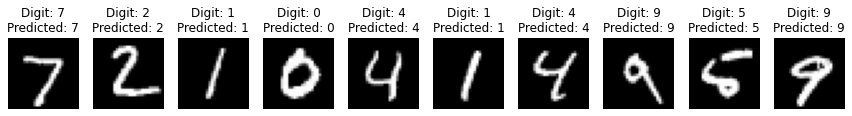

In [53]:
predictions = model_CNN3.predict(X_test)


plt.figure(figsize=(15, 15)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted: {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off') 
plt.show()

In entrambi i casi la predizione è corretta. La rete convoluzionale sembra riuscire a predirre bene anche il penultimo numero, su cui invece la rete DNN faceva più fatica. Si osserva inoltre che la seconda rete ha un andamento leggermente migliore nel test, in quanto la prima sembra saturare verso la quinta epoca (l'accuratezza sul test smette di crescere mentre quella sul train no)

## 12.3: Miei numeri

Uso le reti convoluzionali sopra testate per predirre i numeri da me scritti

In [16]:
from google.colab import files
upload = files.upload() #this will let you browse and choose the file to be uploaded

Saving 7_image.png to 7_image.png
Saving 5_image.png to 5_image.png
Saving 1_image.png to 1_image.png
Saving 0_image.png to 0_image.png
Saving 9_image.png to 9_image.png
Saving 3_image.png to 3_image.png
Saving 4_image.png to 4_image.png
Saving 6_image.png to 6_image.png
Saving 2_image.png to 2_image.png
Saving 8_image.png to 8_image.png


prima rete convoluzionale

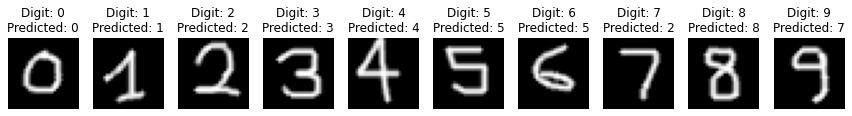

In [31]:
from PIL import Image
import os

digits=['0','1','2','3','4','5','6','7','8','9']


plt.figure(figsize=(15, 15)) 
for k in range(10):    
    digit_filename = "./"+digits[k]+"_image.png"
    digit_in = Image.open(digit_filename).convert('L')
    #digit_in = Image.open("8b.png").convert('L') #ON GOOGLE COLAB INSERT THE NAME OF THE UPLOADED FILE

    ydim, xdim = digit_in.size
    #print("Image size: "+str(xdim)+"x"+str(ydim))
    pix=digit_in.load();
    data = np.zeros((xdim, ydim))
    for j in range(ydim):
        for i in range(xdim):
            data[i,j]=pix[j,i]

    data /= 255
    data = data.reshape(1,xdim,ydim,1)

    prediction = model_CNN.predict(data)
    ax = plt.subplot(2, 10, k + 1)    
    plt.imshow(data[0,:,:,0], cmap='gray')    
    plt.title("Digit: {}\nPredicted: {}".format(k, np.argmax(prediction)))    
    plt.axis('off') 
plt.show()


seconda rete convoluzionale (più layers)

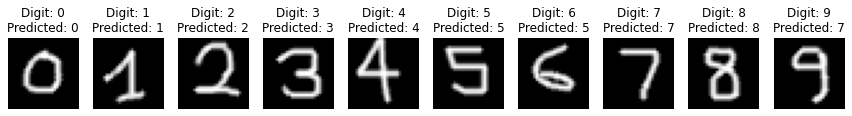

In [32]:

plt.figure(figsize=(15, 15)) 
for k in range(10):    
    digit_filename = "./"+digits[k]+"_image.png"
    digit_in = Image.open(digit_filename).convert('L')
    #digit_in = Image.open("8b.png").convert('L') #ON GOOGLE COLAB INSERT THE NAME OF THE UPLOADED FILE

    ydim, xdim = digit_in.size
    #print("Image size: "+str(xdim)+"x"+str(ydim))
    pix=digit_in.load();
    data = np.zeros((xdim, ydim))
    for j in range(ydim):
        for i in range(xdim):
            data[i,j]=pix[j,i]

    data /= 255
    data = data.reshape(1,xdim,ydim,1)

    prediction = model_CNN2.predict(data)
    ax = plt.subplot(2, 10, k + 1)    
    plt.imshow(data[0,:,:,0], cmap='gray')    
    plt.title("Digit: {}\nPredicted: {}".format(k, np.argmax(prediction)))    
    plt.axis('off') 
plt.show()

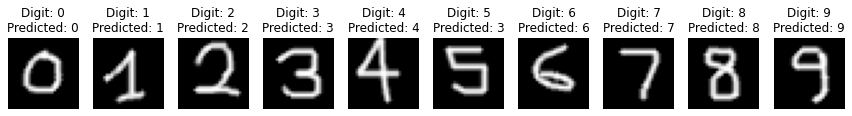

In [54]:

plt.figure(figsize=(15, 15)) 
for k in range(10):    
    digit_filename = "./"+digits[k]+"_image.png"
    digit_in = Image.open(digit_filename).convert('L')
    #digit_in = Image.open("8b.png").convert('L') #ON GOOGLE COLAB INSERT THE NAME OF THE UPLOADED FILE

    ydim, xdim = digit_in.size
    #print("Image size: "+str(xdim)+"x"+str(ydim))
    pix=digit_in.load();
    data = np.zeros((xdim, ydim))
    for j in range(ydim):
        for i in range(xdim):
            data[i,j]=pix[j,i]

    data /= 255
    data = data.reshape(1,xdim,ydim,1)

    prediction = model_CNN3.predict(data)
    ax = plt.subplot(2, 10, k + 1)    
    plt.imshow(data[0,:,:,0], cmap='gray')    
    plt.title("Digit: {}\nPredicted: {}".format(k, np.argmax(prediction)))    
    plt.axis('off') 
plt.show()

La reti convoluzionale sembrano funzionare abbastanza bene, si osserva un leggero miglioramento nella predizione del 7 con la seconda rete a più layers. Nella terza in cui il primo maxpooling viene fatto su pixel 3x3 c'è un migioramento nella previsione del 9 ma un peggioramento nella predizione del 5 